<a href="https://colab.research.google.com/github/khdanzi/oibsip_taskno/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OASIS INFOBYTE INTERNSHIP** : DATA ANALYTICS

### TASK 1:  Exploratory Data Analysis (EDA) on Retail Sales Data

 **Introduction**

Exploratory Data Analysis (EDA) is a crucial step in any data analytics project. It involves examining the data in depth to discover patterns, detect anomalies, test hypotheses, and check assumptions. In this project, you will work with retail sales data to explore and analyze various aspects of the business. The goal is to derive actionable insights that can help the retail business make informed decisions.

**Objective**

The primary objective of this project is to perform EDA on a retail sales dataset to uncover patterns, trends, and insights that can inform strategic decisions. You will analyze sales trends, customer behavior, and product performance, and visualize these insights to effectively communicate your findings.

In [ ]:
#Importing necessary libraries
import pandas as pd         # Linear Algebra
import numpy as np          # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Collecting Data from Drive
from google.colab import drive
drive.mount('/content/drive')

file_data = '/content/drive/My Drive/Colab Notebooks/EDA Analysis/retail_sales_dataset.csv'

import pandas as pd

#Reading the data
df = pd.read_csv(file_data)

#Taking a look at the top 5 rows of the data
df.head(5)


Mounted at /content/drive


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
#Taking a look at the last 5 rows of the data
df.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [ ]:
#Checking column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
# Remove duplicate rows from the Dataset...
df.drop_duplicates(inplace=True)

# Checking for duplicate values...
df.duplicated().sum()

0

In [ ]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
#Looking for missing values...
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
#modal value
df.mode().dropna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
#order data by date
df=df.sort_values(by=['Date'])
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


**TIME SERIES ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#converting date data type date_time format
df['Date'] = pd.to_datetime(df['Date'])

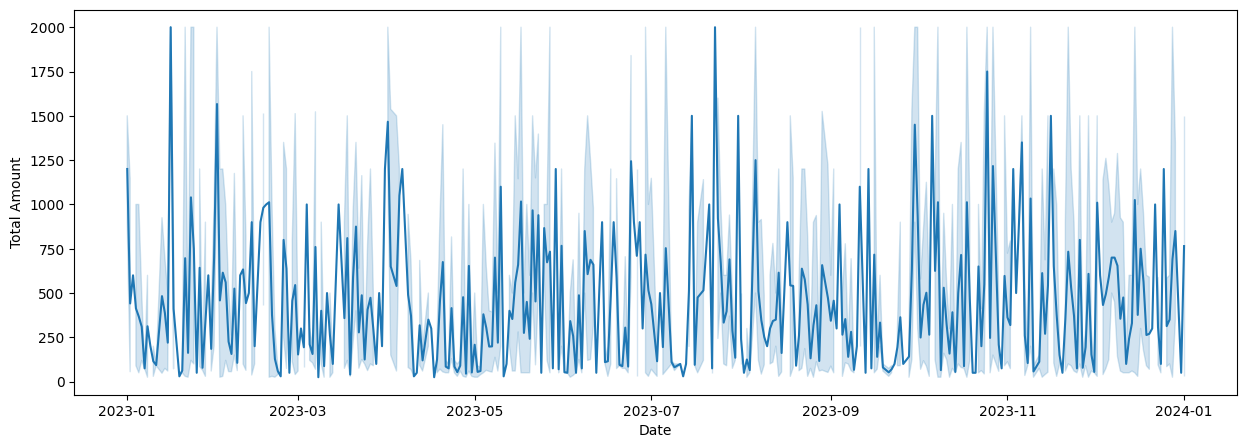

In [ ]:
#obtaining a plot of total amount of particular dates by seaborn

plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Total Amount',data=df)
plt.show()

**Time Series Analysis by Month**

In [ ]:
#creating month and date column

df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [ ]:
#calculating total Monthly_Sales

Monthly_Sales=df.groupby(["Year","Month"],as_index=False)['Total Amount'].sum()
df['Monthly_Sales']=Monthly_Sales['Total Amount']

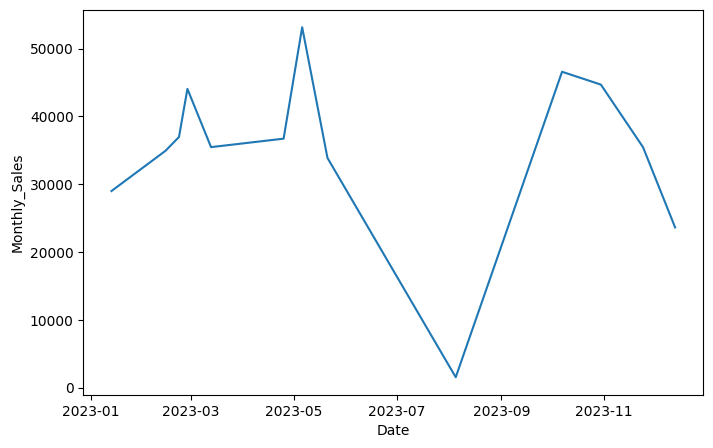

In [ ]:
#plot of Total_Monthly sales throughout the year

plt.figure(figsize=(8,5))
sns.lineplot(x='Date',y='Monthly_Sales',data=df)
plt.show()

**CUSTOMER AND PRODUCT ANALYSIS**

In [ ]:
#Deleting month, year and monthly sales columns
df=df.drop(['Month','Year','Monthly_Sales'],axis=1)
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25
162,163,2023-01-02,CUST163,Female,64,Clothing,3,50,150
420,421,2023-01-02,CUST421,Female,37,Clothing,3,500,1500
609,610,2023-01-03,CUST610,Female,26,Beauty,2,300,600
682,683,2023-01-04,CUST683,Male,38,Beauty,2,500,1000
230,231,2023-01-04,CUST231,Female,23,Clothing,3,50,150


In [ ]:
#creating age brackets
age_bins = [10, 20, 30, 40, 50, 60]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

In [ ]:
#calculating total amount spent by each age group

Total_amount_by_age = df.groupby('Age Group')['Total Amount'].sum()
print(Total_amount_by_age)

Age Group
10-19     34730
20-29     98215
30-39     95950
40-49     93795
50+      100085
Name: Total Amount, dtype: int64


<ipython-input-21-8644e1ae47f7>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Total_amount_by_age = df.groupby('Age Group')['Total Amount'].sum()


In [ ]:
#grouping age group and product category

Grouped_data=df.groupby(['Age Group','Product Category'])['Total Amount'].sum().reset_index()
print(Grouped_data)

   Age Group Product Category  Total Amount
0      10-19           Beauty         11850
1      10-19         Clothing          7255
2      10-19      Electronics         15625
3      20-29           Beauty         33860
4      20-29         Clothing         41415
5      20-29      Electronics         22940
6      30-39           Beauty         32825
7      30-39         Clothing         31250
8      30-39      Electronics         31875
9      40-49           Beauty         33095
10     40-49         Clothing         29540
11     40-49      Electronics         31160
12       50+           Beauty         26835
13       50+         Clothing         34990
14       50+      Electronics         38260


<ipython-input-23-5d2cc6a61841>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Grouped_data=df.groupby(['Age Group','Product Category'])['Total Amount'].sum().reset_index()


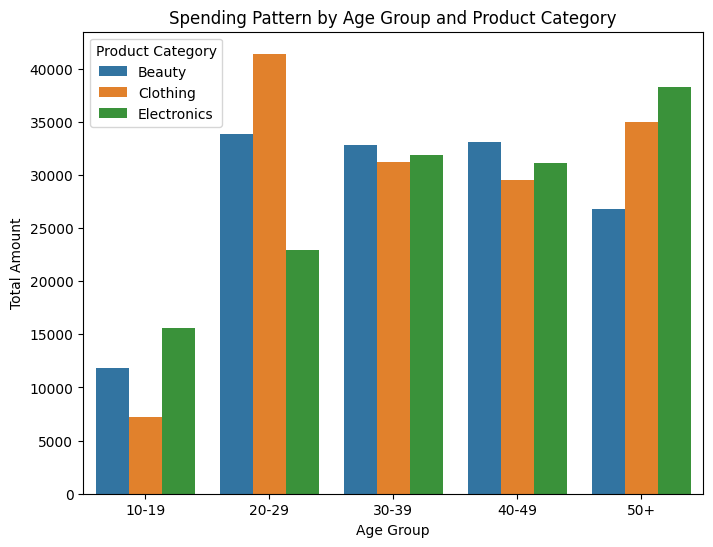

In [ ]:
#create a bar plot to visualize spending pattern by age group and product category

plt.figure(figsize=(8, 6))
sns.barplot(x='Age Group', y='Total Amount', hue='Product Category', data=Grouped_data)
plt.title('Spending Pattern by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

**GENDER SPENDING ANALYSIS**

In [ ]:
#calculating total amount spent by each gender

Total_amount_by_gender = df.groupby('Gender')['Total Amount'].sum()
print(Total_amount_by_gender)

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


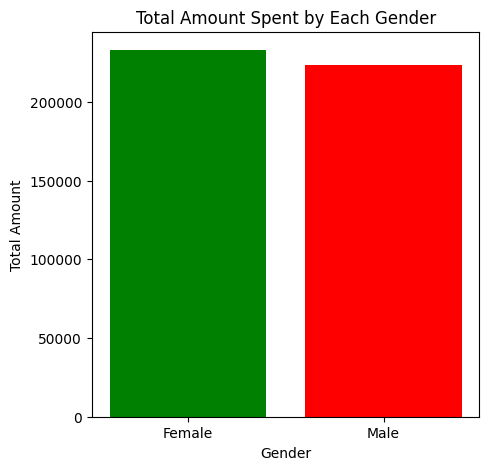

In [ ]:
#obtaining the total spent plot for each gender

plt.figure(figsize=(5, 5))
plt.bar(Total_amount_by_gender.index, Total_amount_by_gender.values, color= ['green','red'] )
plt.title('Total Amount Spent by Each Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

In [ ]:
#product preference by gender

Gender_preference=df.groupby(['Gender','Product Category'])['Total Amount'].sum().reset_index()


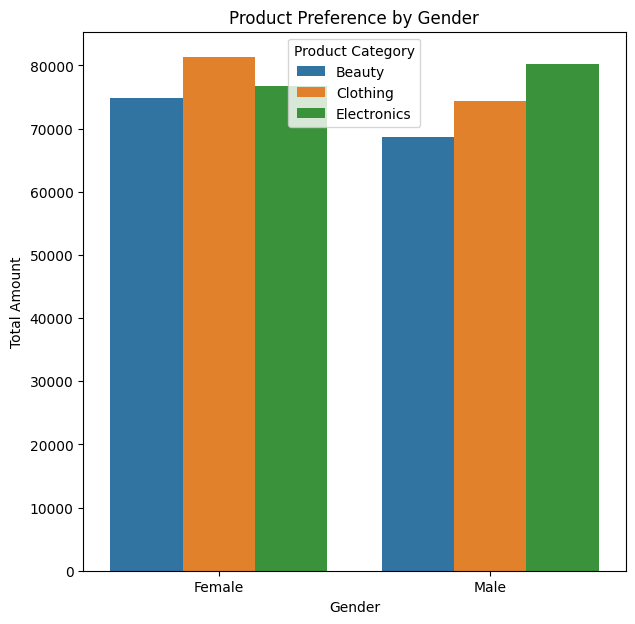

In [ ]:
#plot of products showing preferences by total amount on each side by each gender

plt.figure(figsize=(7, 7))
sns.barplot(x='Gender', y='Total Amount', hue='Product Category', data=Gender_preference)
plt.title('Product Preference by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

In [ ]:
#total amount spent by Average male vs female

Avg_amount_by_Gender=df.groupby('Gender')['Total Amount'].mean()
print(Avg_amount_by_Gender)

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


**PRODUCT PERFORMANCE ANALYSIS**

In [ ]:
#total revenue from each product category

Total_revenue=df.groupby('Product Category')['Total Amount'].sum()
print(Total_revenue)

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


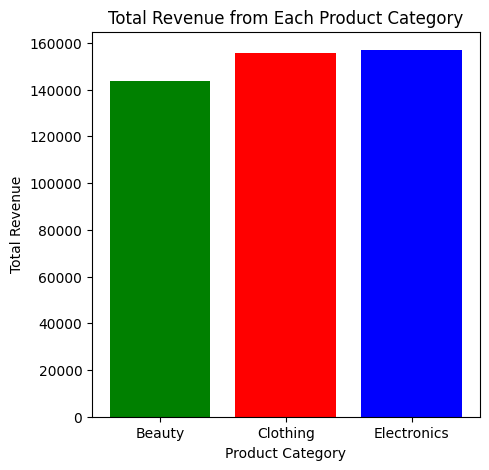

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(Total_revenue.index, Total_revenue.values, color= ['green','red','blue'] )
plt.title('Total Revenue from Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()

In [ ]:
Total_num = df.groupby('Product Category')['Quantity'].sum()
print(Total_num)

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


Present insights through bar charts, line plots, and heatmaps

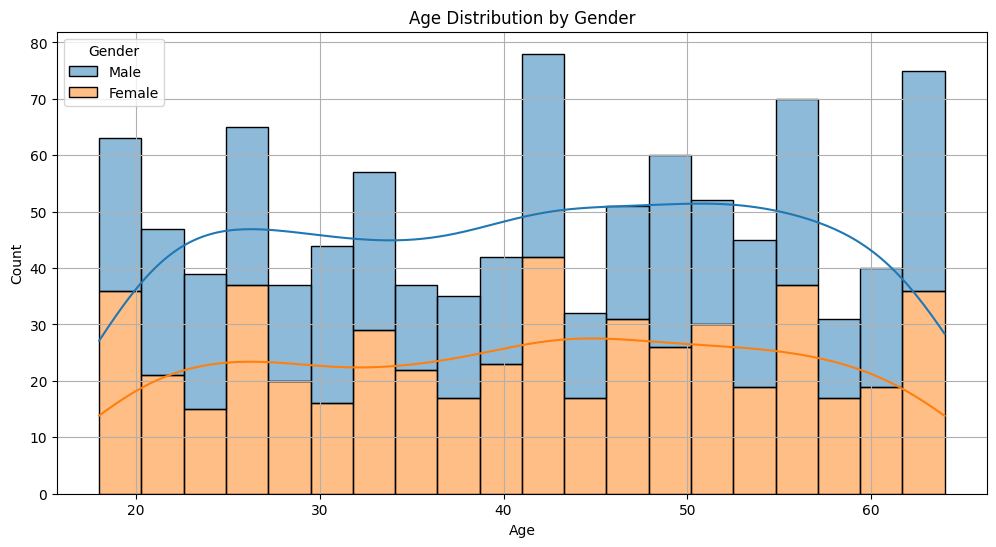

In [ ]:
#bar chart for age distribution by gender

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Gender', bins=20, kde=True, multiple='stack')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

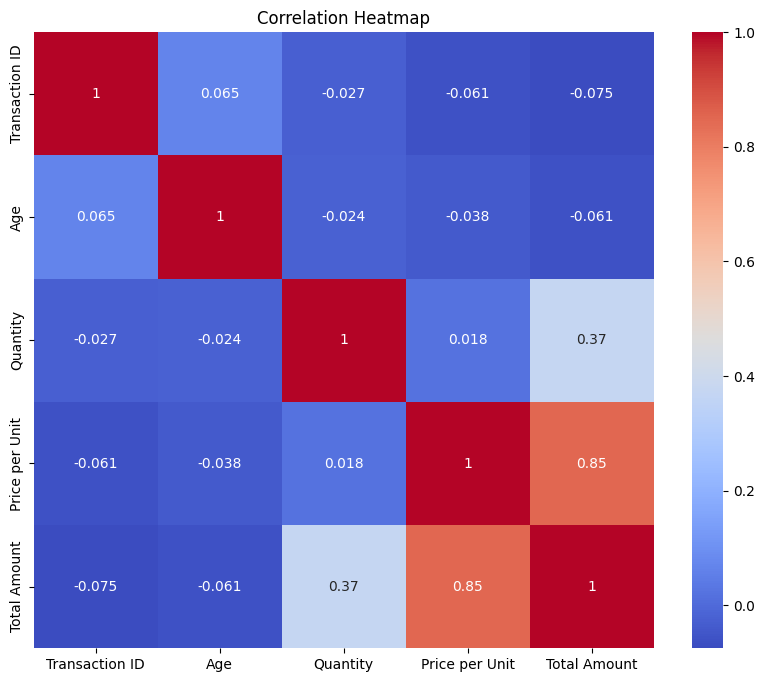

In [ ]:
#heatmaps for correlation between numeric variables
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

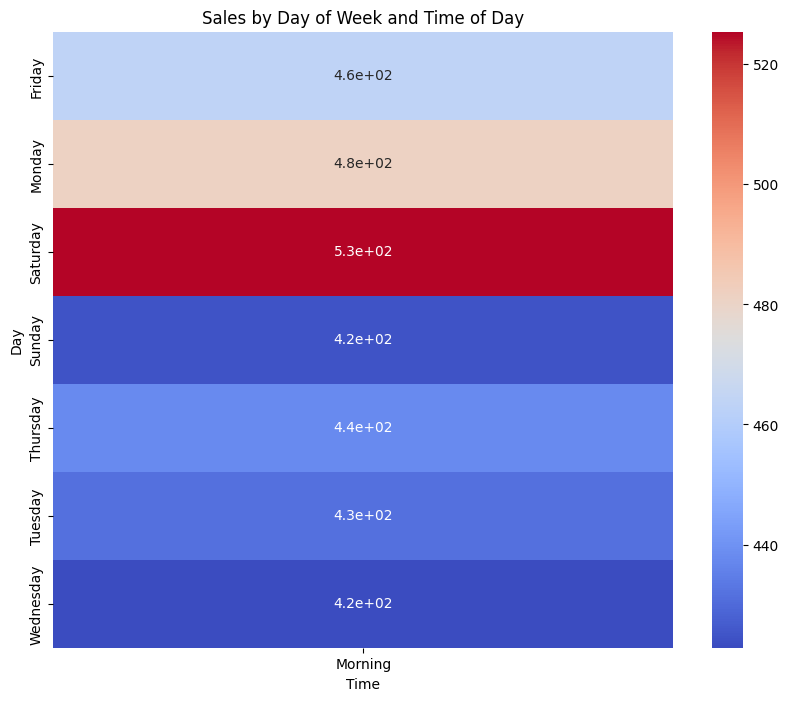

In [ ]:
#heatmap for sales by day of week and time of day
df['Day'] = df['Date'].dt.day_name()
df['Time'] = df['Date'].dt.hour.apply(lambda x: 'Morning' if x<12 else 'Afternoon' if x<18 else 'Evening')
pivot_table = df.pivot_table(values='Total Amount', index='Day', columns='Time', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Sales by Day of Week and Time of Day')
plt.show()

## Recommentations



1.   Strengthen your online presence for age groups that shows a higher inclination towards digital channels to improve sales.
2.   Boost sales by offering promotions or bundles on underperforming categories to attract more customers.
3.   Introduce new variations of best-selling products to capture more market share and meet diverse preferences.
4.   Offer Age group based discounts to increase client turnover for groups that are not performing well.
5.   Collect feedback from customers in each age group and also in gender group to understand their needs and expectations better.


